In [53]:
import pandas as pd

df=pd.read_csv('../Data/Raw/wine_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [54]:
print('data information ')
df.info()
print('\n\n\ndata shape')
df.shape 

data information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB



data shap

(129971, 13)

In [55]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [56]:
df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [57]:
# Drop rows with missing critical values
df = df.dropna(subset=['description', 'points', 'variety','province','price'])

# Fill missing values in less critical columns
df['designation'] = df['designation'].fillna('Unknown')
df['taster_name'] = df['taster_name'].fillna('Unknown')
df['taster_twitter_handle'] = df['taster_twitter_handle'].fillna('Unknown')



# Merge region_1 and region_2 into a single list-like column
def merge_regions(row):
    # Check for NaN values in both columns
    if pd.isna(row['region_1']) and pd.isna(row['region_2']):
        return ['Unknown']  # Set to 'Unknown' if both are NaN
    # Combine non-NaN values into a list
    return [region for region in [row['region_1'], row['region_2']] if not pd.isna(region)]

# Apply the function to create a new 'region' column
df['region'] = df.apply(merge_regions, axis=1)
# Convert list-like column to string to avoid unhashable type error
df['region'] = df['region'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Drop the original columns if no longer needed
df = df.drop(columns=['region_1', 'region_2'])

df.isnull().sum()


country                  0
description              0
designation              0
points                   0
price                    0
province                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
region                   0
dtype: int64

In [58]:
# Drop duplicate rows
df = df.drop_duplicates()

# Reset the index
df.reset_index(drop=True, inplace=True)


In [59]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['description'] = df['description'].apply(clean_text)

## Feature engineering

In [60]:
#Categorize price into bins
df['price_range'] = pd.cut(df['price'], bins=[0, 20, 70, 300, 700], labels=['Low', 'Medium', 'High', 'Luxury'])

df

,country,description,designation,points,price,province,taster_name,taster_twitter_handle,title,variety,winery,region,price_range
0,Portugal,This is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Unknown,Low
1,US,Tart and snappy the flavors of lime flesh and ...,Unknown,87,14.0,Oregon,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,"Willamette Valley, Willamette Valley",Low
2,US,Pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,Unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore,Low
3,US,Much like the regular bottling from 2012 this ...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,"Willamette Valley, Willamette Valley",Medium
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Navarra,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111532,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Anna Lee C. Iijima,Unknown,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Unknown,Medium
111533,US,Citation is given as much as a decade of bottl...,Unknown,90,75.0,Oregon,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,"Oregon, Oregon Other",High
111534,France,Welldrained gravel soil gives this wine its cr...,Kritt,90,30.0,Alsace,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,Alsace,Medium
111535,France,A dry style of Pinot Gris this is crisp with s...,Unknown,90,32.0,Alsace,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,Alsace,Medium


## Exploratory Data Analysis

In [61]:
# Numerical data
display(df[['points', 'price']].describe())

# Categorical data
display(df[['country', 'variety', 'province', 'price_range']].nunique())


,points,price
count,111537.000000,111537.000000
mean,88.413809,35.626276
std,3.099243,42.113062
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


country         42
variety        691
province       422
price_range      4
dtype: int64

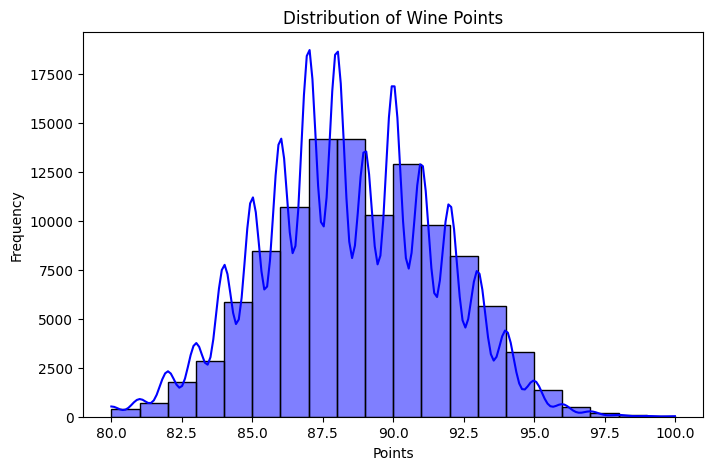

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of wine points
plt.figure(figsize=(8, 5))
sns.histplot(df['points'], bins=20, kde=True, color='blue')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

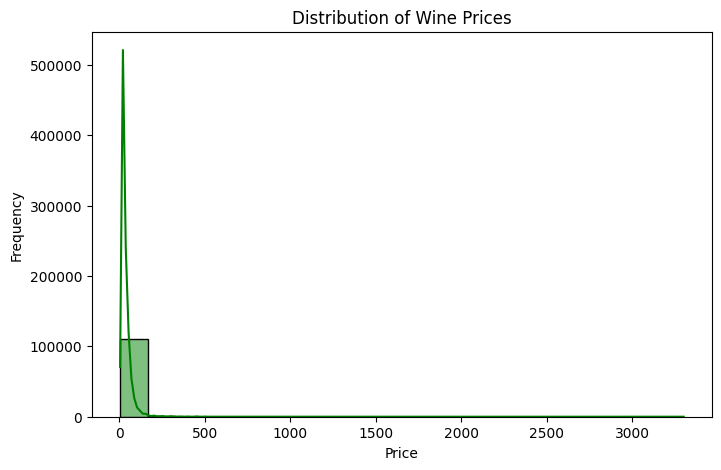

In [63]:
# Distribution of wine prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True, color='green')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18112\373322164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_varieties.values, y=top_varieties.index, palette='viridis')


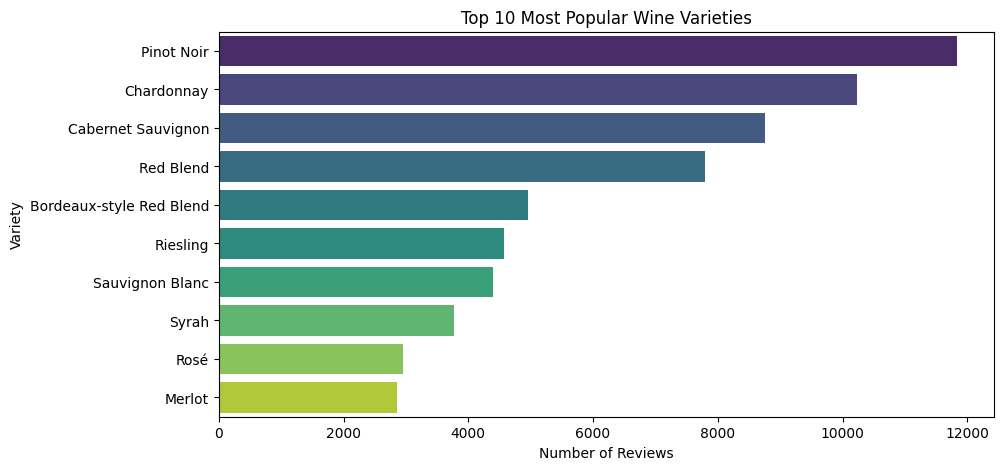

In [64]:
# Top 10 wine varieties
top_varieties = df['variety'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_varieties.values, y=top_varieties.index, palette='viridis')
plt.title('Top 10 Most Popular Wine Varieties')
plt.xlabel('Number of Reviews')
plt.ylabel('Variety')
plt.show()


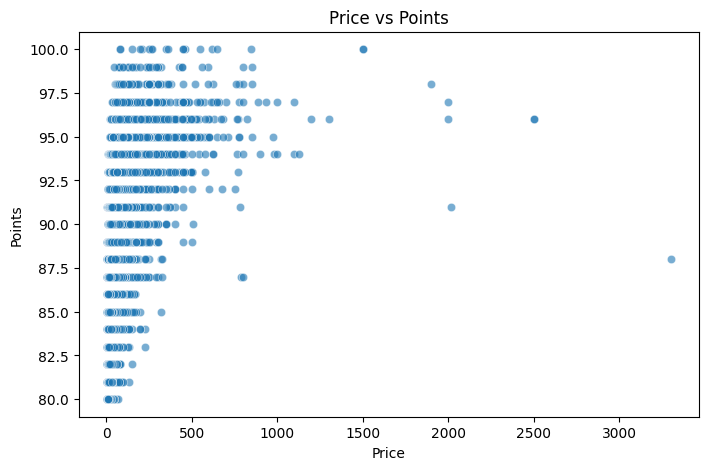

In [65]:
# Price vs points

plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='points', data=df, alpha=0.6)
plt.title('Price vs Points')
plt.xlabel('Price')
plt.ylabel('Points')
plt.show()


In [66]:
#Save the processed data to a new CSV file
df.to_csv('../Data/Processed/wine_data_processed.csv', index=False)